<a href="https://colab.research.google.com/github/leovaldesz/Atividades-Aprendizagem-de-m-quina/blob/master/Semana%205/Semana_5_Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mudança de temperatura na superfície terrestre

#### Temperaturas da superfície do globo e dos oceanos (GlobalTemperatures.csv):

* [Temperatura Global](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)
Foi feita uma alteração no dataset original, nele contêm dados desde 1750, porém com dados faltantes, então optei por utilizar o intervalo de dados apartir de 1950 para melhorar a visualização.

Atributos:
* Date: Começa em 1850.
* LandAverageTemperature: Média da temperatura da superfície global em celsius
* LandAverageTemperatureUncertainty: O intervalo de confiança de 95% em torno da média.
* LandMaxTemperature: Média da temperatura máxima da superfície global em celsius.
* LandMaxTemperatureUncertainty: O intervalo de confiança de 95% em torno da temperatura máxima média.
* LandMinTemperature: temperatura média global mínima da terra em Celsius.
* LandMinTemperatureUncertainty: o intervalo de confiança de 95% em torno da temperatura mínima do solo.
* LandAndOceanAverageTemperature: temperatura média global da terra e do oceano em graus Celsius.
* LandAndOceanAverageTemperatureUncertainty: 
o intervalo de confiança de 95% em torno da temperatura média global da terra e do oceano

## 1. Montando Ambiente e Importando Bibliotecas

In [99]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [100]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [101]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/GlobalTemperatures2.csv')
dados.dt = pd.to_datetime(dados.dt,format='%Y-%m-%d')
dados.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1950-01-01,2008.000,173.00,7.611,207.000,-3622.000,236.000,13311.0,95.0
1,1950-02-01,2721.000,182.00,8475.000,209.000,-3013.000,217.000,13554.0,101.0
2,1950-03-01,5.247,0.15,11173.000,158.000,-0.693,0.200,14296.0,97.0
3,1950-04-01,8123.000,192.00,14157.000,0.216,2043.000,0.280,15093.0,102.0
4,1950-05-01,11297.000,217.00,17.252,259.000,5421.000,0.286,16033.0,106.0


## 2. Análise preliminar dos dados

In [102]:
dados.shape

(792, 9)

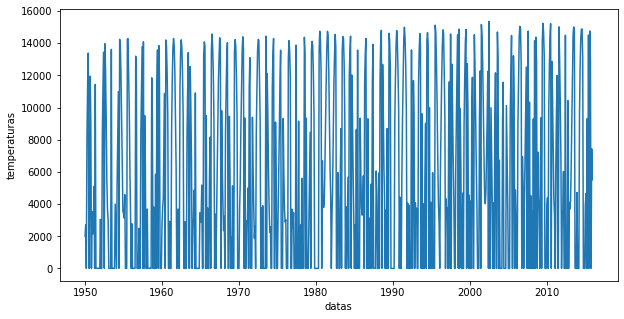

In [103]:
plt.plot(dados.dt,dados.LandAverageTemperature)
plt.xlabel('datas')
plt.ylabel('temperaturas')
plt.show()


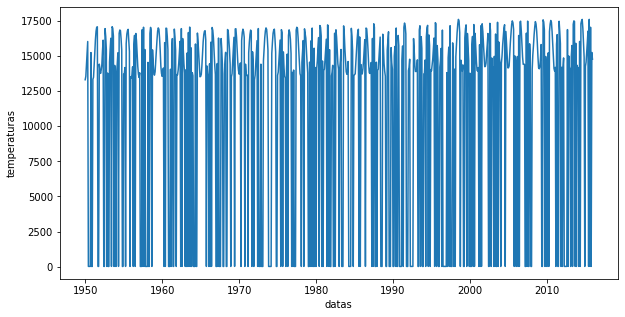

In [104]:
plt.plot(dados.dt,dados.LandAndOceanAverageTemperature)
plt.xlabel('datas')
plt.ylabel('temperaturas')
plt.show()

Apesar de a visualização ser um pouco difícil por conta da quantidade de dados, já da para perceber que há uma sazonalidade nos dados.

In [105]:
## criar coluna com mes do ano e ano
dados['mes'] = dados.dt.dt.month
dados['ano'] = dados.dt.dt.year

In [106]:
mensal = dados.groupby(['ano','mes'],as_index=True)['LandAverageTemperature', 'LandAndOceanAverageTemperature'].mean().reset_index().rename(columns={0:'LandAverageTemperature', 1:'LandAndOceanAverageTemperature'})
mensal.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ano,mes,LandAverageTemperature,LandAndOceanAverageTemperature
0,1950,1,2008.000,13311.0
1,1950,2,2721.000,13554.0
2,1950,3,5.247,14296.0
3,1950,4,8123.000,15093.0
4,1950,5,11297.000,16033.0


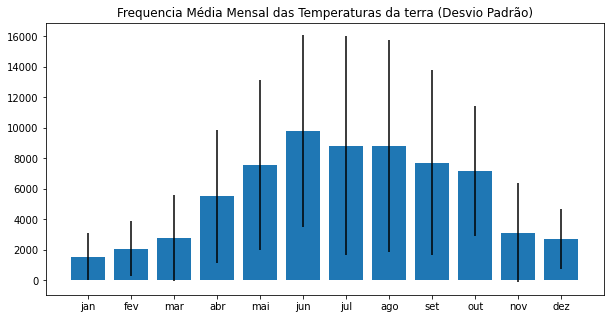

In [107]:
indice = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
stats = mensal.groupby(['mes'],as_index=False)['LandAverageTemperature'].agg(['mean','std'])
plt.bar(indice,stats['mean'],yerr=stats['std'])
plt.title('Frequencia Média Mensal das Temperaturas da terra (Desvio Padrão)')
plt.show()

Aqui podemos ver mais claramente a mudança da temperatura em um ano, onde começa baixa vai aumentando com o passar do ano e no final volta a abaixar

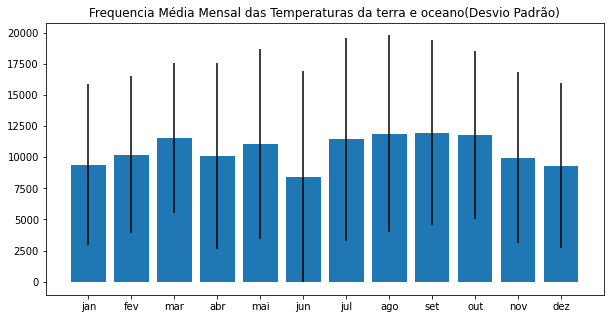

In [108]:
indice = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
stats = mensal.groupby(['mes'],as_index=False)['LandAndOceanAverageTemperature'].agg(['mean','std'])
plt.bar(indice,stats['mean'],yerr=stats['std'])
plt.title('Frequencia Média Mensal das Temperaturas da terra e oceano(Desvio Padrão)')
plt.show()

As temperaturas da terra e oceano não tem um padrão tão definido, mas isso se deve por conta da enorme área estudada que pode ser bem diferentes as temperaturas, como pode se ver o desvio padrão grande

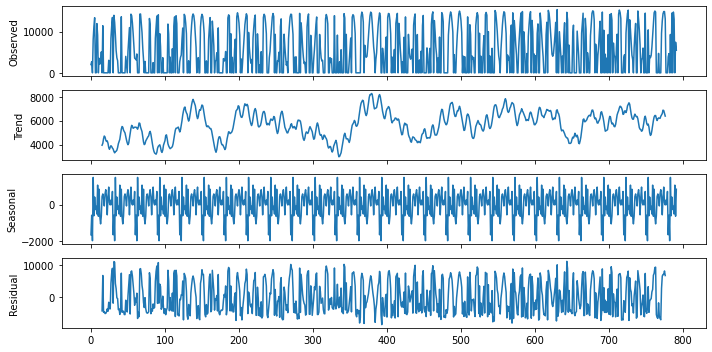

In [109]:
#decomposicao da serie temporal em tendência, sazonalidade e ruído
decomposition = seasonal_decompose(dados.LandAverageTemperature,model='additive',freq=30)
decomposition.plot()
plt.show()

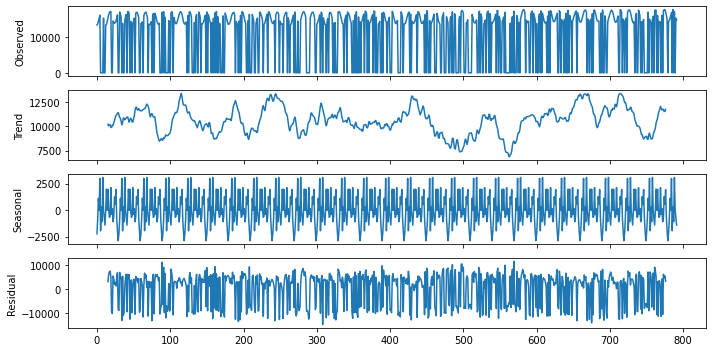

In [110]:
#decomposicao da serie temporal em tendência, sazonalidade e ruído
decomposition = seasonal_decompose(dados.LandAndOceanAverageTemperature,model='additive',freq=30)
decomposition.plot()
plt.show()

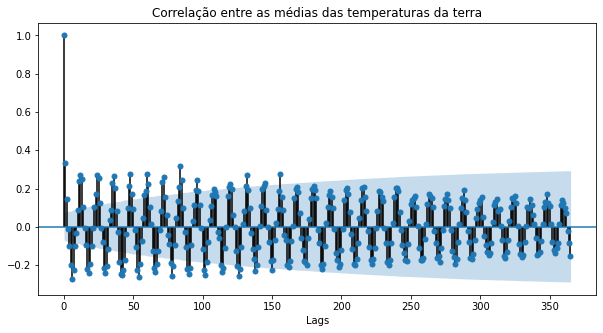

In [111]:
# Função de autocorrelação entre as observações
plot_acf(dados.LandAverageTemperature,lags=365)
plt.title('Correlação entre as médias das temperaturas da terra')
plt.xlabel('Lags')
plt.show()

Aqui podemos ver a correlação entre as temperaturas que apesar de não ser muito clara ela existe.

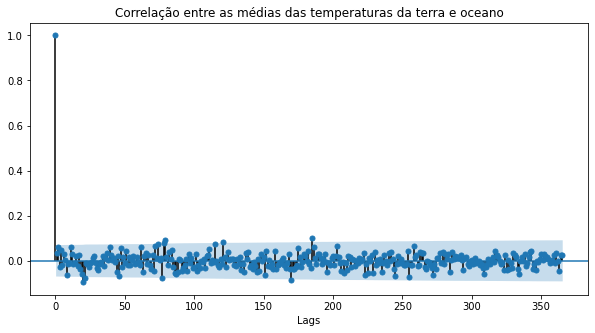

In [112]:
# Função de autocorrelação entre as observações
plot_acf(dados.LandAndOceanAverageTemperature,lags=365)
plt.title('Correlação entre as médias das temperaturas da terra e oceano')
plt.xlabel('Lags')
plt.show()

Já neste podemos ver que a correlação não é clara.

## 3. Organização dos dados para modelagem

In [113]:
def organizarDados(sequence,n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence)-1:
      break
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

#### Temperatura média da terra

In [114]:
X,y = organizarDados(dados['LandAverageTemperature'],30)

In [115]:
X[:10]

array([[2.0080e+03, 2.7210e+03, 5.2470e+00, 8.1230e+03, 1.1297e+04,
        1.3382e+04, 1.4140e+01, 1.3460e+01, 1.1952e+04, 9.1530e+03,
        5.3720e+00, 3.5280e+03, 2.1380e+03, 2.3320e+03, 5.0910e+03,
        8.3670e+00, 1.1438e+04, 1.3250e+01, 1.4324e+01, 1.4021e+01,
        1.2324e+01, 9.6700e+00, 6.2250e+00, 4.3280e+00, 3.0490e+03,
        3.3960e+00, 4.9670e+00, 8.4610e+03, 1.1352e+04, 1.3442e+04],
       [2.7210e+03, 5.2470e+00, 8.1230e+03, 1.1297e+04, 1.3382e+04,
        1.4140e+01, 1.3460e+01, 1.1952e+04, 9.1530e+03, 5.3720e+00,
        3.5280e+03, 2.1380e+03, 2.3320e+03, 5.0910e+03, 8.3670e+00,
        1.1438e+04, 1.3250e+01, 1.4324e+01, 1.4021e+01, 1.2324e+01,
        9.6700e+00, 6.2250e+00, 4.3280e+00, 3.0490e+03, 3.3960e+00,
        4.9670e+00, 8.4610e+03, 1.1352e+04, 1.3442e+04, 1.4549e+01],
       [5.2470e+00, 8.1230e+03, 1.1297e+04, 1.3382e+04, 1.4140e+01,
        1.3460e+01, 1.1952e+04, 9.1530e+03, 5.3720e+00, 3.5280e+03,
        2.1380e+03, 2.3320e+03, 5.0910e+03, 8.

In [116]:
y[:10]

array([1.4549e+01, 1.3964e+04, 1.2238e+04, 9.1570e+03, 5.4250e+03,
       3.6590e+03, 2.9640e+03, 3.6290e+00, 5.7120e+00, 8.8920e+00])

In [117]:
# dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#### Temperatura média do oceano e terra

In [118]:
X2,y2 = organizarDados(dados['LandAverageTemperature'],30)

In [119]:
X2[:10]

array([[2.0080e+03, 2.7210e+03, 5.2470e+00, 8.1230e+03, 1.1297e+04,
        1.3382e+04, 1.4140e+01, 1.3460e+01, 1.1952e+04, 9.1530e+03,
        5.3720e+00, 3.5280e+03, 2.1380e+03, 2.3320e+03, 5.0910e+03,
        8.3670e+00, 1.1438e+04, 1.3250e+01, 1.4324e+01, 1.4021e+01,
        1.2324e+01, 9.6700e+00, 6.2250e+00, 4.3280e+00, 3.0490e+03,
        3.3960e+00, 4.9670e+00, 8.4610e+03, 1.1352e+04, 1.3442e+04],
       [2.7210e+03, 5.2470e+00, 8.1230e+03, 1.1297e+04, 1.3382e+04,
        1.4140e+01, 1.3460e+01, 1.1952e+04, 9.1530e+03, 5.3720e+00,
        3.5280e+03, 2.1380e+03, 2.3320e+03, 5.0910e+03, 8.3670e+00,
        1.1438e+04, 1.3250e+01, 1.4324e+01, 1.4021e+01, 1.2324e+01,
        9.6700e+00, 6.2250e+00, 4.3280e+00, 3.0490e+03, 3.3960e+00,
        4.9670e+00, 8.4610e+03, 1.1352e+04, 1.3442e+04, 1.4549e+01],
       [5.2470e+00, 8.1230e+03, 1.1297e+04, 1.3382e+04, 1.4140e+01,
        1.3460e+01, 1.1952e+04, 9.1530e+03, 5.3720e+00, 3.5280e+03,
        2.1380e+03, 2.3320e+03, 5.0910e+03, 8.

In [120]:
y2[:10]

array([1.4549e+01, 1.3964e+04, 1.2238e+04, 9.1570e+03, 5.4250e+03,
       3.6590e+03, 2.9640e+03, 3.6290e+00, 5.7120e+00, 8.8920e+00])

In [121]:
# dividindo dados em treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2)

## 4. Treinando os modelos e fazendo previsões

#### Temperatura média da terra

In [122]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_linear = linear.predict(X_test)

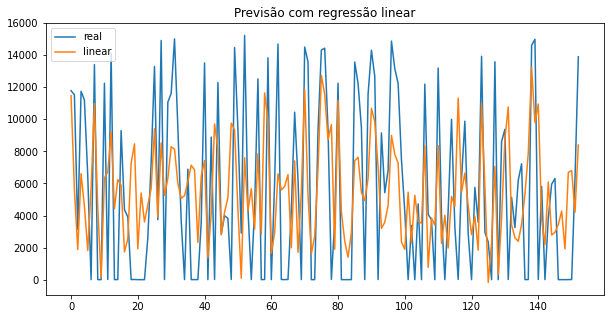

In [123]:
#plotando resultados da MLP
plt.plot(y_test,label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

Com o resultado podemos ver que os dados previstos estão em um intervalo menor que os dados reais, porém os valores não diferem tanto.

In [124]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

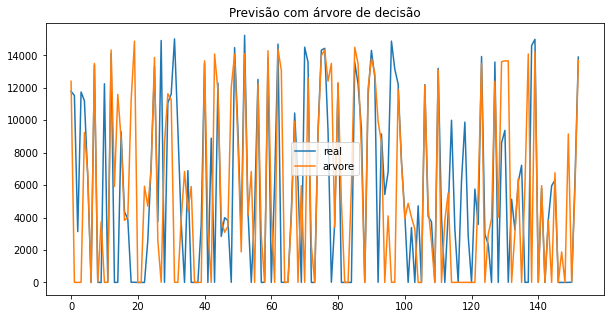

In [125]:
#plotando resultados da árvore de decisão
plt.plot(y_test,label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

Com os resultados da árvore podemos ver que o intervalo dos resultados e dos previstos são mais parecidos, e os resultados estão mais próximos da realidade

In [126]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X_train,y_train)
pred_floresta = floresta.predict(X_test)

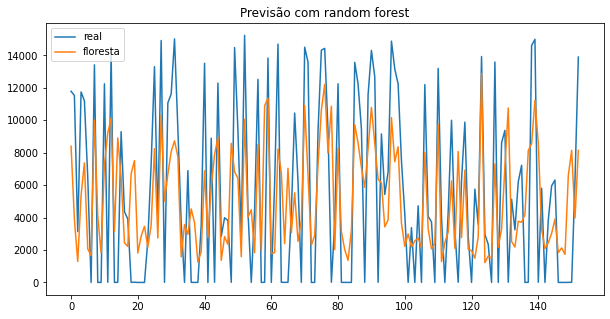

In [127]:
#plotando resultados da random forest
plt.plot(y_test,label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

O resultado da random florest foi muito mais próximo da regressão linear que da árvore de decisão.

In [128]:
#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


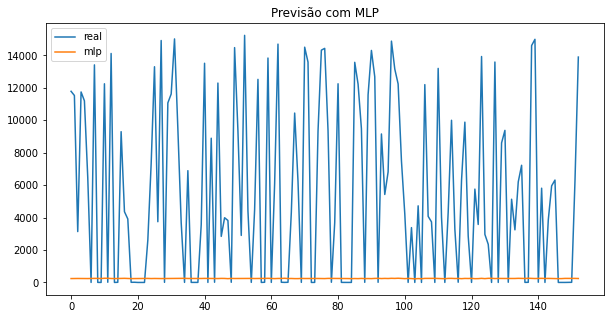

In [129]:
#plotando resultados da MLP
plt.plot(y_test,label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

Os resultados da MLP deram 0, não consegui encontrar o motivo.

In [130]:
print('MAE')
print('\tRegressão Linear:',round(mean_absolute_error(y_test,pred_linear),2))
print('\tArvore de Decisão:',round(mean_absolute_error(y_test,pred_arvore),2))
print('\tRandom Forest:',round(mean_absolute_error(y_test,pred_floresta),2))
print('\tMLP:',round(mean_absolute_error(y_test,pred_mlp),2))

MAE
	Regressão Linear: 3942.18
	Arvore de Decisão: 3458.82
	Random Forest: 3644.29
	MLP: 5516.59


In [131]:
print('MSE')
print('\tRegressão Linear:',round(mean_squared_error(y_test,pred_linear),2))
print('\tArvore de Decisão:',round(mean_squared_error(y_test,pred_arvore),2))
print('\tRandom Forest:',round(mean_squared_error(y_test,pred_floresta),2))
print('\tMLP:',round(mean_squared_error(y_test,pred_mlp),2))

MSE
	Regressão Linear: 21729927.5
	Arvore de Decisão: 31586198.71
	Random Forest: 18349037.88
	MLP: 57429354.45


In [132]:
print('RMSE')
print('\tRegressão Linear:',round(mean_squared_error(y_test,pred_linear)**(1/2),2))
print('\tArvore de Decisão:',round(mean_squared_error(y_test,pred_arvore)**(1/2),2))
print('\tRandom Forest:',round(mean_squared_error(y_test,pred_floresta)**(1/2),2))
print('\tMLP:',round(mean_squared_error(y_test,pred_mlp)**(1/2),2))

RMSE
	Regressão Linear: 4661.54
	Arvore de Decisão: 5620.16
	Random Forest: 4283.58
	MLP: 7578.22


In [133]:
def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [134]:
print('MAPE')
print('\tRegressão Linear:',round(mean_absolute_percentage_error(y_test,pred_linear)**(1/2),2))
print('\tArvore de Decisão:',round(mean_absolute_percentage_error(y_test,pred_arvore)**(1/2),2))
print('\tRandom Forest:',round(mean_absolute_percentage_error(y_test,pred_floresta)**(1/2),2))
print('\tMLP:',round(mean_absolute_percentage_error(y_test,pred_mlp)**(1/2),2))

MAPE
	Regressão Linear: 16.49
	Arvore de Decisão: 14.77
	Random Forest: 14.93
	MLP: 4.12


Os que tiveram os melhores resultados foram Regressão Linear, Árvore de Decisão e Random Florest. na maioria dos teste eles obtiveram resultados semelhantes, porém ouve uma pequena vantagem para a Random Florest.

#### Temperatura média da terra e oceano

In [135]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X2_train,y2_train)
pred_linear = linear.predict(X2_test)

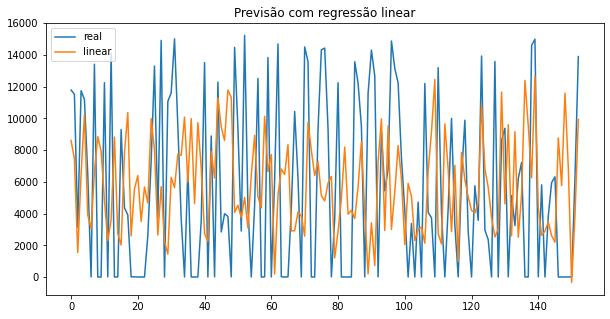

In [136]:
#plotando resultados da MLP
plt.plot(y_test,label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

Graficamente os resultados estão em uma escala um pouco menor, mas mesmo assim eles estão próximos dos reais

In [137]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X2_train,y2_train)
pred_arvore = arvore.predict(X2_test)

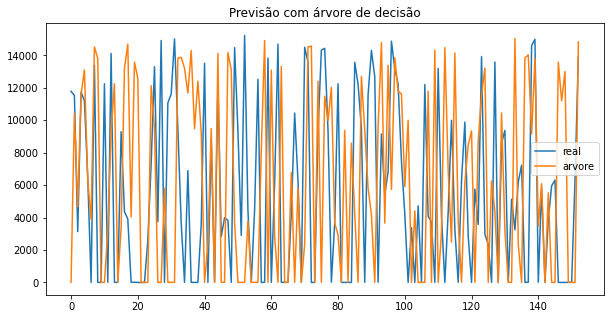

In [138]:
#plotando resultados da árvore de decisão
plt.plot(y_test,label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

Este já teve resultados muito mais próximos em questão de escala mas com diferenças.

In [139]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X2_train,y2_train)
pred_floresta = floresta.predict(X2_test)

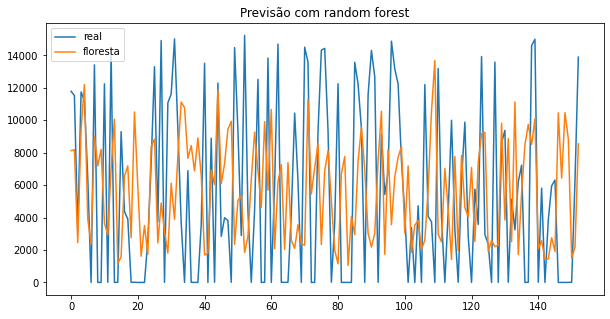

In [140]:
#plotando resultados da random forest
plt.plot(y_test,label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

Random forest obteve resultados parecidos graficamente com a Regressão linear.

In [141]:
#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)
mlp.fit(X2_train,y2_train)
pred_mlp = mlp.predict(X2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


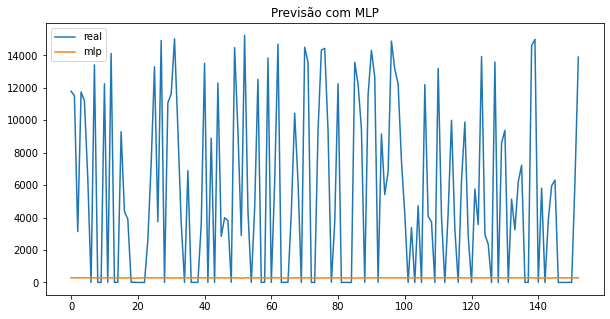

In [142]:
#plotando resultados da MLP
plt.plot(y_test,label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

A MLP graficamente também obteve resultados 0.

In [143]:
print('MAE')
print('\tRegressão Linear:',round(mean_absolute_error(y_test,pred_linear),2))
print('\tArvore de Decisão:',round(mean_absolute_error(y_test,pred_arvore),2))
print('\tRandom Forest:',round(mean_absolute_error(y_test,pred_floresta),2))
print('\tMLP:',round(mean_absolute_error(y_test,pred_mlp),2))

MAE
	Regressão Linear: 5381.03
	Arvore de Decisão: 6363.23
	Random Forest: 5249.83
	MLP: 5505.8


In [144]:
print('MSE')
print('\tRegressão Linear:',round(mean_squared_error(y_test,pred_linear),2))
print('\tArvore de Decisão:',round(mean_squared_error(y_test,pred_arvore),2))
print('\tRandom Forest:',round(mean_squared_error(y_test,pred_floresta),2))
print('\tMLP:',round(mean_squared_error(y_test,pred_mlp),2))

MSE
	Regressão Linear: 39758499.42
	Arvore de Decisão: 65131312.06
	Random Forest: 39790291.97
	MLP: 57028677.58


In [145]:
print('RMSE')
print('\tRegressão Linear:',round(mean_squared_error(y_test,pred_linear)**(1/2),2))
print('\tArvore de Decisão:',round(mean_squared_error(y_test,pred_arvore)**(1/2),2))
print('\tRandom Forest:',round(mean_squared_error(y_test,pred_floresta)**(1/2),2))
print('\tMLP:',round(mean_squared_error(y_test,pred_mlp)**(1/2),2))

RMSE
	Regressão Linear: 6305.43
	Arvore de Decisão: 8070.4
	Random Forest: 6307.95
	MLP: 7551.73


In [146]:
def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [147]:
print('MAPE')
print('\tRegressão Linear:',round(mean_absolute_percentage_error(y_test,pred_linear)**(1/2),2))
print('\tArvore de Decisão:',round(mean_absolute_percentage_error(y_test,pred_arvore)**(1/2),2))
print('\tRandom Forest:',round(mean_absolute_percentage_error(y_test,pred_floresta)**(1/2),2))
print('\tMLP:',round(mean_absolute_percentage_error(y_test,pred_mlp)**(1/2),2))

MAPE
	Regressão Linear: 20.46
	Arvore de Decisão: 21.79
	Random Forest: 19.97
	MLP: 4.42


Os resultados foram parecidos com o caso anterior, onde a Regressão, Árvore e floresta tem resultados bem parecidos, com uma pequena vantagem para a floresta.